# Übung zur Nullstellenbestimmung von Polynomen

### Ziel der Übung

Einen Algorithmus in `numpy` zu implementieren, welcher allenfalls komplexe Nullstellen von beliebigen, mindestens zweimal stetig differenzierbaren Funktionen finden soll. Der Algorithmus soll dann in ein kleines Tool gepackt werden, welches alle Nulstellen eines beiliebigen Polynoms mit reellen Koeffizienten numerisch berechnen und ausgeben soll. 

Dazu müssen Sie 

1. das in der Vorlesung besprochene Müller-Verfahren implementieren.

2. eine Repräsentation für Polynome und einen Algorithmus zur Polynomdivision implementieren.

3. das Müller-Verfahren und die Polynomdivision kombinieren, um alle Nullstellen eines beliebigen Polynoms zu finden, indem gefundene Nullstellen vom Polynom faktorisiert werden. 


### Rahmenbedingungen / Abgabe

Die Studierenden sollen die Lösungen selbständig erarbeiten. Die Lösungen sind in folgender Form abzugeben:
* ein __Jupyter Notebook__ mit den implementierten Funktionen gemäss Vorlage. Als Vorlage nehmen Sie dieses Notebook.
* ein __PDF__ mit der Lösung der handschriftlichen Aufgaben.

Bei der Implementierung sollen ausschliesslich Library-Funktionalität von `numpy` verwendet werden und *nicht* darauf aufbauender Funktionalität z.B. aus `scipy` oder ähnlich. 

Weitere nützliche Informationen könnten Sie im pdf-Dokument (Müller-Verfahren) gescannt aus G. Opfer _Numerische Mathematik für Anfänger_, Vieweg 2001.  


### Abgabetermin: 28. Mai 19

Bitte senden Sie Ihre Lösungen gut dokumentiert per Email an [Martin Melchior](mailto:martin.melchior@fhnw.ch).

*Hinweis*: Je besser Sie Ihre Berechnungen und Ihren Code kommentieren, desto eher können Sie bei Fehlern noch Teilpunkte erhalten.

## Teil 1: Polynome und deren Nullstellen

Eine häufige Aufgabenstellung ist das Finden von Nullstellen von Polynomen mit reellen Koeffizienten. Der [Fundamentalsatz der Algebra](https://de.wikipedia.org/wiki/Fundamentalsatz_der_Algebra) besagt, dass jedes Polynom genauso viele Nullstellen hat wie der Grad des Polynoms - wobei Nullstellen auch doppelt vorkommen und im allgemeinen komplex sein können. 


### Linear-Faktorisierung
Das erlaubt, jedes Polynom vom Grad $n$ als Produkt von $n$ Linearfaktoren zu schreiben, d.h. in der Form:

$$p(x) = a\prod_{k=1}^n (x-x_k)$$

wobei $x_1,...,x_n$ die Nullstellen des Polynoms bezeichnen. Dabei können dieselben Nullstellen auch mehrfach vorkommen (d.h. $x_k$ und $x_j$ können auch identisch sein.

Zum Beispiel hat das Polynom $p(x) = x^3 + x^2 = x^2 \cdot (x+1)$ die Linearfaktorisierung 

$$p(x) = x \cdot x \cdot (x+1) = (x-x_1)\cdot (x-x_2)\cdot (x-x_3) {\rm  \quad mit \qquad} x_1=x_2=0, x_3=-1$$


### Übung 1.1 (handschriftlich) [5 Punkte]

Zeigen Sie, dass ein Polynom $p(x)$ mit Nullstellen $x_1,...,x_n$ als Linear-Faktorisierung geschrieben werden kann.

* Zeigen Sie zuerst, dass falls $x^*$ eine Nullstelle des Polynoms $p(x)$ ist ($p$ soll ein Polynom vom Grad $n$ sein), so lässt sich $p$ schreiben als $p(x)=(x-x^*)\cdot q(x)$ wobei $q(x)$ ein Polynom vom Grad $n-1$. Drücken Sie die Koeffizienten des Polynoms $q(x)=b_{n-1} x^{n-1} + \dots + b_1 x + b_0$ durch die Koeffizienten des Polynoms $p(x)=a_n x^n + a_{n-1} x^{n-1} + \dots + a_1 x + a_0$ aus. _Tipp: Entwickeln Sie das Polynom $p$ zentriert um die Nullstelle $x^*$._

* Zeigen Sie dann die allgemeine Aussage mit vollständiger Induktion.



### Komplexe Nullstellen
Komplexe Nullstellen von reellen Polynomen (mit reellen Koeffizienten in der kanonischen Form) kommen immer in Paaren vor: sie sind jeweils Komplex-Konjugierte voneinander.

Als Beispiel untersuchen wir die Nullstellen des Polynoms

$$p(x) = x^4 -1$$

Neben den beiden Lösungen $x_1=1$ und $x_2=-1$ existieren ebenfalls die Lösungen $x_3=+i$ und $x_4=-i$, da $(\pm i)^4 = \left(i^2\right)^2 = (-1)^2 = 1$. Stellen wir die Lösungen $x$ in Polarform dar, so sind sie symmetrisch auf der komplexen Zahlenebene verteilt:

<img src="polarx4.png">


### Übung 1.2 (handschriftlich) [2 Punkte]

Zeigen Sie, dass falls die komplexe Zahl $z^*$ eine Nullstelle des reellen Polynoms $p(x)=a_n x^n + a_{n-1} x^{n-1} + \dots + a_1 x + a_0$ ist (Koeffizienten $a_k$ sind reell), so ist auch deren Komplex-Konjugierte $\overline{z^*}$ eine Nullstelle des Polynoms $p(x)$.




## Teil 2: Das Müller-Verfahren

Im Unterricht wurde das Müller-Verfahren behandelt, das mittels geeigneter Anfangswerte $\{x_0, x_1, x_2\}$ eine Nullstelle einer beliebigen Funktion $f(x)$ durch schrittweise Annäherung zu finden versucht. Im Gegensatz zum Newton-Verfahren, wo die Annäherung durch eine Tangente erfolgt, werden hier die schrittweisen Näherungen mittels einer Parabel konstruiert. Das bringt den Vorteil, dass gemäss Mitternachtsformel auch komplexe Lösungen gefunden werden können. 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Keine weiteren imports werden notwendig sein.

### Übung 2.1 [3 Punkte]

Implementieren Sie nun eine Funktion `fit_parabola`, welche wie in der eine Parabel durch drei verschiedene Punkte (mit $x$-Werten $x_0, x_1, x_2$) des Funktionsgraphen einer beliebigen Funktion $f$ legt. Die Parabel sei parameterisiert durch $p(x)=a(x-x_2)^2+b(x-x_2)+c$. Die Funktion soll die Parameter $a,b,c$ zurückgeben.

In [16]:
def fit_parabola( f, x0, x1, x2 ):
    """
    Fits a parabola to the function f in the points (x0, x1, x2) and returns the 
    parameters (a,b,c) of the parabola.
    
    Arguments:
    f -- arbitrary Python function with one argument
    x0 -- data point x_0 (real or complex number)
    x1 -- data point x_1 (real or complex number)
    x2 -- data point x_2 (real or complex number)
    
    Returns:
    a, b, c -- parabola's parameters
    """
    
    # EXERCISE START
    '''
    # solve the system M A = B  where A=[a,b,c]   B=[f(x0),f(x1),f(x2)]
    X = np.array([x0,x1,x2])
    M = np.ones((3,3))+0j
    M[:,0] = X**2
    M[:,1] = X
    B = np.array([f(x0),f(x1),f(x2)])
    #A = np.linalg.inv(M).dot(B)
    A = np.linalg.solve(M,B)
    a, b, c = A[0], A[1], A[2]
    '''
    # Evaluate the function given at the three points x0, x1 and x2
    fx0 = np.complex(f(x0))
    fx1 = np.complex(f(x1))
    fx2 = np.complex(f(x2))
    
    # find the coefficients of the parabola using the equations in pg 10 of the vana script
    a = np.complex(((fx0-fx2)*(x1-x2)-(fx1-fx2)*(x0-x2))/((x0-x2)*(x1-x2)*(x0-x1)))
    b = np.complex(((fx1-fx2)*(x0-x2)**2-(fx0-fx2)*(x1-x2)**2)/((x0-x2)*(x1-x2)*(x0-x1)))
    c = np.complex(f(x2))
    
    
    # EXERCISE STOP
    
    return a, b, c


Sie können jetzt in drei beliebigen Punkten eine Parabel an Ihre Funktion $f$ legen.
Mit dem untenstehenden Test erhalten Sie einen Hinweis, ob Sie die Funktion korrekt implementiert haben.

In [17]:
# Test function 
f = lambda x: x**4 - 1
x0,x1,x2 = 0.0,1.0,2.0
a,b,c = fit_parabola( f, x0,x1,x2 )

np.testing.assert_array_almost_equal(a, 7.0, decimal=9)
np.testing.assert_array_almost_equal(b, 22.0, decimal=9)
np.testing.assert_array_almost_equal(c, 15.0, decimal=9)


# Für Parabeln sollte die usrpüngliche Parabel zurückgegeben werden (geeignet zentriert um x2)
f2 = lambda x: (x-2.0)**2+2*(x-2.0)-1
x0,x1,x2 = 0.0,1.0,2.0
a,b,c = fit_parabola( f2, x0,x1,x2 )

np.testing.assert_array_almost_equal(a, 1.0, decimal=9)
np.testing.assert_array_almost_equal(b, 2.0, decimal=9)
np.testing.assert_array_almost_equal(c, -1.0, decimal=9)


Überprüfen Sie mit Hilfe eines Plots, ob Ihre Funktion die korrekten Parameter zurückgibt: Plotten Sie hierzu die ursprüngliche Funktion, die gefittete Parabel und heben Sie die Punkte mit $x_0,x_1,x_2$ auf dem Graphen geeignet hervor.

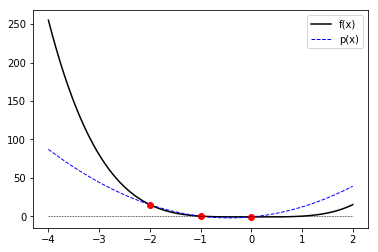

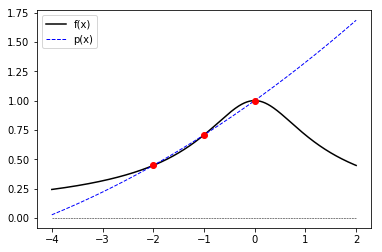

In [18]:
def plot_approximation( f, x0, x1, x2 ):
    x = np.linspace( x0-np.abs(x2-x0), x2+np.abs(x2-x0), 1000 )
    params = fit_parabola( f, x0, x1, x2 )    
    plt.plot( x, f(x), color="black", label="f(x)" )
    p = lambda x: params[0]*(x-x2)**2 + params[1]*(x-x2) + params[2]
    plt.plot( x, p(x), color="blue", linestyle="--", linewidth=1, label="p(x)" )
    plt.plot( [x0,x1,x2], [f(x0),f(x1),f(x2)], 'o', color="red" )
    plt.plot( x, x*0, color="black", linestyle="--", linewidth=0.5 )
    plt.legend()
    plt.show()
    
plot_approximation( f, -2, -1, 0 )
plot_approximation( lambda x: 1/(1+x**2)**(0.5), -2,-1,0)

Die Parabel sollte durch die drei roten Punkte gehen.

In einem Iterationsschritt muss nun unter Verwendung der Funktion`fit_parabola` die Approximation berechnet und davon dann die Nullstellen bestimmt werden.

Für die Nullstellen der Parabel $p(x)=a(x-x_2)^2+b(x-x_2)+c$ verwenden wir die Mitternachts-Formel:

$$ x_3^\pm - x_2 = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$

Der nächste Iterationswert $x_3$ soll nun so gewählt werden, dass der Abstand zu $x_2$ am kleinsten ist.

Im Skript wird hierzu folgende Formel angegeben: 
 
$$ x_3 = x_2 - \frac{2c}{b + \text{sgn}(b) \, \sqrt{b^2-4ac}} $$

Diese Formel funktioniert, solange $b$ reell ist. Allerdings ist nicht mehr gewährleistet, wenn $b$ complex ist.


### Übung 2.2 [5 Punkte]

* Erläutern Sie, wie $x_3$ berechnet werden soll, wenn $b$ komplex ist. 
* Geben Sie eine entsprechende Formel an, die Sie in der Implementierung verwenden können. 
* Überlegen Sie sich, welche Fälle speziell behandelt werden müssen und geben Sie entsprechende Formel an.
* Überlegen Sie sich, in welchen Fällen keine Nullstelle resultiert. Implementieren Sie in diesen Fällen ein geeignetes Handling.

### Komplexe Zahlen mit Numpy

Numpy rechnet standardmässig nicht mit komplexen Zahlen, erst wenn Sie es explizit fordern. So liefert zum Beispiel `np.sqrt(-1)` den Wert `nan` (not a number zurück) und erst `np.sqrt(-1+0j)` erkennt, dass es auch komplexe Lösungen verwenden darf und liefert `1j` zurück. Beachten Sie, dass numpy statt `i` für den Imaginärteil `j` verwendet (und damit Konventionen aus der Elektrotechnik folgt, wo `i` bereits den Strom bezeichnet). Sie können numpy mit folgenden zwei Möglichkeiten dazu zwingen, komplexe Zahlen zu verwenden (also den Input als komplexe Zahl casten), hier beispielhaft mit der Wurzelfunktion:

```
> np.sqrt(-1+0j)
1j
> np.sqrt(np.complex(-1))
1j
```

Stellen Sie also in ihrem Code sicher, dass die Wurzelfunktion ein komplexes Argument übergeben bekommt.

### Übung 2.3 [3 Punkte]

Implementieren Sie die Funktion in `numpy`.

In [19]:
def parabolaRoot(a, b, c, eps=1.0e-12):
    """
    Returns for a parabola with (possibly complex) canonical parameters (a,b,c) the root ('Nullstelle') 
    suited for the Mueller method.
    
    Arguments:
    a -- coefficient for the squared variable
    b -- linear coefficient
    c -- constant coefficient
    eps - numerical tolerance (absolute values smaller than `eps` are treated as zeros)
    
    Returns:
    r -- suitable root or None if no root can be found
    """
    
    # EXERCISE START
    try: # try to  calculate the root if it exists. If it doesn't, junp to except part.
        return -2*c/np.complex((b+np.sign(b)*np.sqrt(b**2-4*a*c)))
    except:
        return None # return None if there is no root.
    #return -2*c/np.complex((b+np.sign(b)*np.sqrt(b**2-4*a*c)))
    
    
    
    # EXERCISE STOP

#### Tests

In [20]:
np.testing.assert_almost_equal(parabolaRoot(2,3,1), -0.5, decimal=10)
np.testing.assert_almost_equal(parabolaRoot(0,2,1), -0.5, decimal=10)
np.testing.assert_equal(parabolaRoot(0,0,1) is None, True)

### Übung 2.4 [5 Punkte]

Implementieren Sie nun das Müller-Verfahren zur Berechnung einer Nullstelle. Ihre Funktion sollte aus einem Funktions-Objekt $f$ und Anfangswerten $\{x_0,x_1,x_2\}$ iterativ so lange neue Werte $x_n$ bestimmen, bis entweder eine gewünschte Genauigkeit $\varepsilon$ oder eine maximale Anzahl von Iterationen $n_\text{max}$ erreicht wurde. Allenfalls müssen die Stützstellen, welche verwendet werden, um die Parabel zu bestimmen, modifiziert werden, damit eine Nullstelle bestimmt werden kann. 

In [21]:
from warnings import warn

N_INNER_LOOP = 10

def mueller( f, x0, x1, x2, nmax=100, eps=1e-8 ):
    """
    Finds a root of the function f with the Mueller method using the initial values x0, x1 and x2.
    Checks first whether one of the initial values already is a root.
    
    Arguments:
    f -- arbitrary Python function with one argument
    x0 -- initial point x0 (real or complex number)
    x1 -- initial point x1 (real or complex number)
    x2 -- initial point x2 (real or complex number)
    nmax -- maximum allowed number of iterations
    eps -- desired accuracy
    
    Returns:
    rootf -- the root: f(x) = 0 or None if no such root could be found (e.g. for constant functions)
    x -- all iterations of x (for diagnostic purposes)
    """
    
    # EXERCISE START
    # fit a parabola to the three initial values at the function f
    a,b,c = fit_parabola( f, x0, x1, x2 )

    # initialize the list of all iterations
    x = []
    
    #check if x0, x1 or x2 are  already a root of the function. If yes, then stop and return this root.
    x.append(x0)
    if abs(f(x0)) < eps: # check if f(x0) is almost zero (i.e x0 is root)
        print('x0 is already a root')
        rootf = x0
        return rootf,x
    
    x.append(x1)
    if abs(f(x1)) < eps: # check if f(x1) is almost zero (i.e x1 is root)
        print('x1 is already a root')
        rootf = x1
        return rootf,x
    
    x.append(x2)
    if abs(f(x2)) < eps: # check if f(x2) is almost zero (i.e x2 is root)
        print('x2 is already a root')
        rootf = x2
        return rootf,x
    
    n = 0 # initialize the iteration counter
    while n < nmax: # keep the iteration constrained to nmax
        
        # determine the parabola Root
        parRoot = parabolaRoot(a, b, c, eps=1.0e-12)
        
        if parRoot == None: # check if root is inexistent, if yes stop the iteration and return x3
            x3 = x2
            break
            
        # otherwise, update the value of x3 using the equation below
        x3 = x2 + parRoot
        
        x.append(x3) # append x3 to the history list
        
        if abs(parRoot) < eps: # if the parabola Root found is almost zero, then x3 is one of the roots of f
            rootf = x3
            break
        
        # update the values of x0, x1 and x2 by x1, x2 and x3 respectively
        x0 = x1
        x1 = x2
        x2 = x3
        
        try: # try to determine the new parabola coefficients with the new x0 x1 x2 values. If the three points are aligned then  go to expect
            a,b,c = fit_parabola( f, x0, x1, x2 )
        except:
            rootf = x3
            break
        
        n += 1 # increase the iteration counter
    #print("Reached maximum number of iterations")
    rootf = x3
    
    
    return rootf, x
    # EXERCISE STOP

#### Implementierungs Tests
Sie können nun Ihre Funktion laufen lassen und prüfen, ob die zurückgegebene Nullstelle eine von $\{-1,1,-i,i\}$ ist:

In [22]:
f = lambda x: x**4-1
root, history = mueller( f, 0, 1, 2 )
print(root, np.abs(f(root)))
root, history = mueller( f, 0, 1j, 2j )
print(root, np.abs(f(root)))
root, history = mueller( f, 0, 3, 5 )
print(root, np.abs(f(root)))
root, history = mueller( f, 0, 3j, 5j )
print(root, np.abs(f(root)))

f = lambda x: 2*x-1
root, history = mueller( f, 0, 1, 2 )
print(root, np.abs(f(root)))

x1 is already a root
1 0
x1 is already a root
1j 0.0
(1+2.7854122416415746e-24j) 1.1141648966566298e-23
-1j 0.0
(0.5+0j) 0.0


Ebenfalls können Sie die verschiedenen Iterationen von $x$ plotten: Je nach Wahl der Startwerte $x_0,x_1,x_2$ braucht es mehr oder weniger Iterationen um gegen die Nullstelle zu konvergieren.

(1-1.9382222419957366e-17j) 7.752888967982946e-17


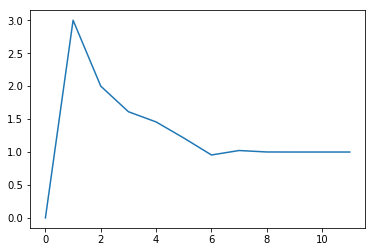

In [23]:
f = lambda x: x**4-1
root, history = mueller( f, 0, 3, 2 )
print(root, np.abs(f(root)))
plt.plot( np.abs(history) )

Überprüfen Sie Ihre Implementierung auch noch mit anderen Testfunktionen, z.B. $p(x) = x^4 + 16$ 

In [24]:
p = lambda x: x**4+16
root, history = mueller( p, 0, 1, 2 )
print(root, np.abs(p(root)))

p = lambda x: x**2-2*x+1
root, history = mueller( p, 0, 1, 2 )
print(root, np.abs(p(root)))

p = lambda x: 2*x+1
root, history = mueller( p, 0, 1, 2 )
print(root, np.abs(p(root)))


(1.4142135623730951+1.414213562373095j) 7.105427357601002e-15
x1 is already a root
1 0
(-0.5+0j) 0.0


### Übung 2.5

Untersuchen Sie die Konvergenz des Müller-Verfahrens für Polynome der Form $f(x) = x^m + c$ für $m \in [2,5,10,20,50]$ und $c \in [1,4,10,100,1000]$. Probieren Sie dazu verschiedene Initialwerte aus. Konvergiert das Verfahren für alle Werte von $m$ und $c$? Ist die Konvergenz von den Initialwerten abhängig?

In [25]:
f = lambda x: x**4-1
root, history = mueller( f, 0, 1, 2 )
print(root, np.abs(f(root)))
root, history = mueller( f, 0, 1j, 2j )
print(root, np.abs(f(root)))
root, history = mueller( f, 0, 3, 5 )
print(root, np.abs(f(root)))
root, history = mueller( f, 0, 3j, 5j )
print(root, np.abs(f(root)))

f = lambda x: 2*x-1
root, history = mueller( f, 0, 1, 2 )
print(root, np.abs(f(root)))

x1 is already a root
1 0
x1 is already a root
1j 0.0
(1+2.7854122416415746e-24j) 1.1141648966566298e-23
-1j 0.0
(0.5+0j) 0.0


In [27]:
def convergence_table( x0, x1, x2 ):

    m_range = [2,5,10,20,50]
    c_range = [1,4,10,100,1000]

    steps = np.zeros( [len(c_range), len(m_range)])
    
    for i in range( len( c_range ) ):
        for j in range( len( m_range ) ):
            root, history = mueller( lambda x: x**m_range[j] + c_range[i], x0, x1, x2 )
            steps[i,j] = len(history)
    
    return steps

In [29]:
convergence_table(0,2,4)
# the convergence rate is dependant of the initial guess. And it can be seen that for higher values of m (last columns), with 
# c increasing (from first to last row), it requires more iteration. Also, with m increasing (from first to last column),
# the number of iterations also increase.

array([[ 4., 17., 28., 42., 90.],
       [ 5., 15., 24., 40., 86.],
       [ 5., 13., 22., 38., 86.],
       [ 5., 34., 17., 34., 80.],
       [ 5., 14., 14., 28., 74.]])

In [30]:
convergence_table( -2, -1, 0 )
# for this initial guess, the algorithm is cut short for high exponents m.

x1 is already a root


array([[  3.,   2.,  14.,  39.,   4.],
       [  3.,  17.,  11.,   9.,   4.],
       [  3.,  22.,  11., 103.,   4.],
       [  3.,  16.,  11.,   7.,   4.],
       [  3.,  13.,  21.,   7.,   4.]])

In [31]:
convergence_table( -20, -10, 0 )
# for this initial guess, it cuts short for even samller vales than the example above, and it reaches maximum iteration for 
# higher values of c even with lower m.

array([[  3.,  12.,   4.,   4.,   4.],
       [  3.,  12.,   4.,   4.,   4.],
       [  3.,  12.,   4.,   4.,   4.],
       [  3., 103.,   4.,   4.,   4.],
       [  3., 103.,   4.,   4.,   4.]])

In [32]:
convergence_table( 0, 10, 20 )
# for higher values of m, the algorithm runs up to maximum iteration, thus not properly converging

array([[  4.,  33.,  60., 103., 103.],
       [  5.,  29.,  57., 103., 103.],
       [  5.,  29.,  56., 103., 103.],
       [  5.,  25.,  50., 102., 103.],
       [  7.,  21.,  46.,  98., 103.]])

**Fassen Sie Ihre Beobachtungen zusammen:**

__EXERCISE START__

Die Konvergenz des Verfahrens ist enorm von der Wahl der Anfangspunkte abhängig, speziell für Polynome mit grossen Exponenten ($m>20$). Eine Wahl von negativen Anfangspunkten scheint öfters zu Konvergenzproblemen zu führen.

__EXERCISE STOP__

## Teil 3: Die Polynomdivision

Die Polynomdivision ist eine Rechenregel ähnlich wie die schriftliche Division. Sie können damit ein Polynom durch ein anderes dividieren und den Quotienten und den allfälligen Rest berechnen:

$$
\frac{p(x)}{q(x)} = s(x) + \frac{r(x)}{q(x)}
$$

Ziel dieser Übung ist es, einen Algorithmus zu implementieren, welcher als Argumente eine geeignete Repräsentation der Polynome $p$ (Dividenden-Polynom) und $q$ (Divisor-Polynom) erwartet und das Quotienten-Polynom sowie das Rest-Polynom ausrechnet. 

### Übung 3.1 [2 Punkte]

Wir empfehlen Ihnen die folgende Repräsentation für Polynome:

Ist $p(x) = \sum_{k=0}^{n} \alpha_k x^k$, so speichern wir es als Liste

$$p = [\alpha_0, \alpha_1, \alpha_2, \dots, \alpha_n]$$

Beachten Sie, dass der Vorfaktor der höchsten Potenz am Schluss der Liste steht. Repräsentieren Sie als Beispiel die zwei Polynome

$$p(x) = 4x^5 - x^4 + 2x^3 + x^2 - 1$$ und $$q(x) = x^2+1$$


In [33]:
# EXERCISE START
p = np.array([-1,0,1,2,-1,4])

q = np.array([1,0,1])
# EXERCISE STOP

### Übung 3.2 [8 Punkte]

Für die oben eingeführte Repräsentation brauchen Sie Funktionen zum Auswerten, Addieren, Subtrahieren und Multiplizieren von Polynomen. Implementieren Sie eine Funktion `polyval( x, p )`, die das durch die Liste `p` repräsentierte Polynom an der Stelle `x` auswertet, eine Funktion `polyadd( p, q )`, die die zwei (als Listen repräsentierten) Polynome `p` und `q` addiert und als Resultat ebenfalls wieder eine Liste zurückgibt und eine Funktion `polymul( p, q )`, die die Polynome `p` und `q` multipliziert. Die Subtraktion soll ganz einfach über `polyadd( p, -q )` ermöglicht werden.  

Folgende zwei Punkte sind zu beachten:

1. Stellen Sie sicher, dass alle drei Funktionen auch mit komplexen Polynomkoeffizienten funktionieren. Die Standard-Rechenoperationen sind alle für komplexe Zahlen definiert, aber wenn Sie zum Beispiel eine Liste von Nullen mit `np.zeros([m,n])` definieren, sind nachher nur reelle Zahlen erlaubt. Das können Sie mit `np.zeros([m,n]).astype( np.complex )` umgehen.

2. Numpy hat bereits eine Reihe von äquivalenten Funktionen für die Behandlung von Polynomen, die in `numpy.polynomial.polynomial` abgelegt sind. Diese Funktionen dürfen Sie **nicht** für die Lösung verwenden, aber es ist durchaus erlaubt, sie zur Kontrolle ihrer Resultate zu verwenden.

In [34]:
def polyval( x, p ):
    """
    Returns the value of a polynomial with parameters p at position x
    
    Arguments:
    x -- input value (real or complex number)
    p -- parameters of the polynomial, a numpy array
    
    
    Returns:
    p(x) -- the polynomial with parameters p evaluated at position x
    """
    # EXERCISE START
    
    n = 0
    
    # initialize the response variable so it incorporates complex values
    res = np.complex(0)
    # iterate at the list p to calculate the product of coefficient with x**n
    for pval in p:
        res += pval*x**n
        n += 1
    
    # EXERCISE STOP
    return res


In [35]:
def polyadd( p, q ):
    """
    Adds the parameters of two polynomials p and q
    
    Arguments:
    p -- parameters of the polynomial p, a numpy array
    q -- parameters of the polynomial q, a numpy array
    
    Returns:
    p+q -- parameters of the polynomial p(x) + q(x), a numpy array
    """
    # EXERCISE START
    
    # check which polynomy is bigger. 
    if len(p)<len(q):
        pass
    else: # If p is bigger than q, shift one another
        q,p = p,q
    
    # By doing the procedure above, from this part we work as if p was the smaller polynomy
    res = q.astype(complex)
    n = 0
    for pval in p:
        res[n] = res[n]+pval
        n+=1
            
    
    
    # EXERCISE STOP
    return res

In [36]:
def polymul( p, q ):
    """
    Computes the parameters of the polynomial that results when a polynomial with parameters p is multiplied
    with a polynomial with parameters q.
    
    Arguments:
    p -- parameters of the polynomial p, a numpy array
    q -- parameters of the polynomial q, a numpy array
    
    Returns:
    p*q -- parameters of the polynomial p(x) * q(x)
    """
    # EXERCISE START
    
    # initialize the response variable with proper size and as type complex
    res = np.zeros(len(p)+len(q)-1).astype(np.complex)
    
    for o1,i1 in enumerate(q):
        for o2,i2 in enumerate(p):
            res[o1+o2] += i1*i2
    
    # EXERCISE STOP
    return res

**Test Cases**:

In [37]:
v = np.array([1.+0.j, 0.+0.j, 1.+1.j])
w = np.array([0.+1.j, 1.+0.j, 0.+0.j, 0.+2.j])
np.testing.assert_almost_equal( polyval( 10+1j, v ), 80+119j, decimal=10 )
np.testing.assert_array_almost_equal( polyadd( v, w ), np.array([1.+1.j, 1.+0.j, 1.+1.j, 0.+2.j]), decimal=10 )
np.testing.assert_array_almost_equal( polyadd( v, [0] ), v, decimal=10 )
np.testing.assert_array_almost_equal( polymul( v, w ), np.array([ 0.+1.j,  1.+0.j, -1.+1.j,  1.+3.j,  0.+0.j, -2.+2.j]), decimal=10 )
np.testing.assert_array_almost_equal( polymul( v, [1] ), v, decimal=10 )


### Übung 3.3 [5 Punkte]

Nun haben Sie das nötige Werkzeug in der Hand, um einen Algorithmus zur Polynomdivision zu implementieren:

In [38]:
def strip( p ):
    """
    Reduces the representation of the polynomial to be as short in lenght as possible, 
    i.e. it strips off zeros at the end.

    Arguments:
    p -- parameters of the polynomial p
    
    Returns:
    p_red -- reduced list of parameters with trailing zeros ommitted.
    """
    return np.trim_zeros( p, trim='b' ) 

def power( a, n ):
    return np.append( np.zeros(n), a )

def polydiv( p, q ):
    """
    Computes the parameters of the polynomial division p(x)/q(x) and its rest.
    Removes zero coefficients associated with the highest powers.
    
    Arguments:
    p -- parameters of the polynomial p
    q -- parameters of the polynomial q
    
    Returns:
    p/q -- parameters of the quotient p(x)/q(x)
    rest -- rest of the division p(x)/q(x)
    """
    # EXERCISE START
    N = strip(p.copy()).astype(complex) # Numerator
    D = strip(q).astype(complex) # Denominator
    
    dN = len(N) # degree of N
    dD = len(D) # degree of D
    
    n = dN - dD # how much to shift D
    #print(f"n = {n}")
    
    # initiialize the quocient with proper size (diff in degree + 1)
    q = np.zeros(n+1).astype(complex)
    #print(f"q = {q}")
    
    iter= 0
    while dN >= dD and iter<10:
        n = dN - dD # how much to shift D
        
        d = power(D,n).astype(complex) # d is D shifted by n
        #print(f"d = {d}")
        
        # the "last" (highest degree) elment of q is found by 
        # dividing the last numerator element by the last denominator degree
        q[n] = (N[-1]/d[-1]).astype(complex)
        #print(f"q = {q}")
        
        #print(f"-d = {-d*q[n]}")
        # applying the division to the numerator. It reduces one degree of it,
        # so apply strip to remove zeros on the right
        N = strip(polyadd(N,-d*q[n])).astype(complex)
        #print(f"N = {N}")
        
        # recalculate the degree of N
        dN = len(N) # degree of N
        iter += 1
        #print(f"iter = {iter}")
        #print("")
    return q,N
    
    
    
    
    # EXERCISE STOP
    
    

#### Test

Setzen Sie die anfänglich definierten Polynome $p$ und $q$ ein und überprüfen Sie das Resultat:

In [39]:
p = np.array([-1,0,1,2,-1,4])
q = np.array([1,0,1])
s,r = polydiv( p, q )
s0,r0 = np.polynomial.polynomial.polydiv( p, q )
np.testing.assert_array_almost_equal(s0, s, decimal=10)
np.testing.assert_array_almost_equal(r0, r, decimal=10)

p = np.array([-1,0,1,2,-1,4,0,0])
q = np.array([1,0,1,0,0,0])
s,r = polydiv( p, q )
s0,r0 = np.polynomial.polynomial.polydiv( p, q )
np.testing.assert_array_almost_equal(s0, s, decimal=10)
np.testing.assert_array_almost_equal(r0, r, decimal=10)

p = np.array([-1,0,1,2,-1,4])
q = np.array([1])
s,r = polydiv( p, q )
s0,r0 = strip(p), []
np.testing.assert_array_almost_equal(s0, s, decimal=10)
np.testing.assert_array_almost_equal(r0, r, decimal=10)

## Teil 4: Bestimmung aller Nullstellen eines Polynoms

### Übung 4.1 [5 Punkte]

Im Folgenden werden Sie die in Teil 2 und 3 implementierten Funktionen `mueller` und `polydiv` verwenden, um alle Nullstellen eines Polynoms zu finden. Implementieren Sie dazu eine Funktion `poly_roots`, die eine Nullstelle nach der anderen bestimmt und die Nullstelle $x_0$ jeweils entfernt, indem es das Polynom durch $(x-x_0)$ dividiert.

Verwenden Sie als Testbeispiel wieder $f(x) = x^4 - 1$, mit den Nullstellen $\{-1,1,-i,i\}$.

In [40]:
import warnings
def poly_roots( p, x0, x1, x2, eps=1.0e-8):
    """
    Computes all roots of the polynomial with parameters p, given a set of initial points x0, x1, x2.
    Prints a warning in case a polynomial division results in a non-zero rest. 
    
    Arguments:
    p -- parameters of the polynomial p
    x0 -- initial point x0 (real or complex number)
    x1 -- initial point x1 (real or complex number)
    x2 -- initial point x2 (real or complex number)
    
    Returns:
    roots -- list of (complex) roots of the polynomial
    """
    # EXERCISE START
    # initialize the list to store the roots
    roots = []
    
    
    while len(p) > 1:
        # create a lambda function to evaluate the polynomial at any point x
        f = lambda x: polyval(x,p.astype(complex))
        
        # apply mueller method at the initial guess to determine one of the roots
        r0,history = mueller( f, x0, x1, x2, nmax=100, eps=1e-8 )
        
        # Once the root is determined, create the binomal (x-r0) = [-r0,1] and 
        # divide the original p by this binomial and replace p with this new polynomial.
        p,r = polydiv(p,np.array([-r0,1]))
        
        #print(f'p = {p} \t\t r0 = {r0} \t\t r = {r}')
        if len(r)>0: # check if the rest is not zero and give a warning
            warnings.warn('Non-zero rest obtained!')
        
        # append the root found to roots list
        roots.append(r0)

    
    return roots
    
    
    # EXERCISE STOP

Mit folgender Funktion können Sie die gefundenen Nullstellen auf der komplexen Zahlenebene darstellen:

In [41]:
def polar_plot( roots ):
    for x in roots:
        plt.polar([0,np.angle(x)],[0,np.abs(x)],marker='o', label=str(np.round(x,8)) )
    plt.legend( bbox_to_anchor=(1.05, 1), loc=2 )

x2 is already a root
[-1, (0.5-1.3228756555322954j), (0.5+1.3228756555322954j)]


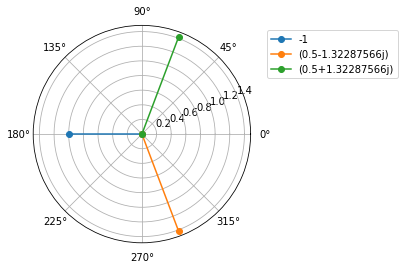

In [42]:
f = np.array([2, 1, 0, 1])
roots = poly_roots( f, -3, -2, -1 )
print(roots)
polar_plot(roots)

[(-0.6760967247269783+0.9783183434785161j), (-0.6760967247269785-0.978318343478516j), (0.6760967247269785+0.978318343478516j), (0.6760967247269785-0.9783183434785161j)]


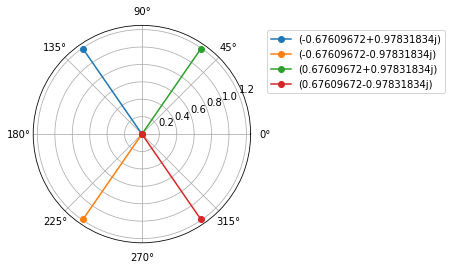

In [43]:
f = np.array([2, 0, 1, 0, 1])
roots = poly_roots( f, -3, -2, -1 )
print(roots)
polar_plot(roots)

### Übung 4.2 [2 Punkte]

Schreiben Sie nun einen aussagekräftigen Test um zu überprüfen, das Sie mit Ihrer Implementierung alle Nullstellen finden. Verwenden Sie geeignete Anfangswerte ($\{x_0, x_1, x_2\}$). Für die Wahl der Anfangswerte konsultieren Sie den Auszug aus dem Buch _Numerische Methoden_ von G.Opfer. 

In [44]:
def test_roots(p, acc_digits=8):
    """
    Tests for the polynomial with parameter vector p whether the all the roots returned by poly_roots 
    are roots and whether all roots have been found.  
    
    Arguments:
    p -- parameters of the polynomial p
    
    Returns:
    pass -- true if all determined roots are roots and all roots are found. 
    """
    
    # Proper determination of initial values using the equations stated in pg 107 from the book
    x0 = p[0] - p[1] + p[2]
    x1 = p[0] + p[1] + p[2]
    x2 = p[0]
    
    # x0,x1 and x2 must be all different so keep changing them until they are all different.
    while x0 == x1 or x0 == x2 or x1 == x2:
        if x0 == x1:
            x0 = x1+1
        if x0 == x2:
            x0 = x2+1
        if x1 == x2:
            x1 = x2+1
    
    roots = poly_roots( p, x0, x1, x2 )
    print(roots)
    polar_plot(roots)
    # EXERCISE START
    # check the degree of the polynomial
    degree = len(p)-1
    
    # create a checking mark list to check with True each test
    checking_mark = []
    
    # Test 1) check if the number of roots is as expected (to be equal to the degree of the polynomial)
    if len(roots) == degree:
        checking_mark.append(True)
    else:
        checking_mark.append(False)
    
    # Test 2) Check if all roots found are really foots (f(root) ~= 0) using the TOL level
    TOL = np.complex(10**(-acc_digits))
    for root in roots:
        if abs(polyval(root,p)) < TOL:
            checking_mark.append(True)
        else:
            checking_mark.append(True)
    
    # pass_ checks if all checking mark are True and return Ture, otherwise if there is a single False, it is False.
    pass_ = all(checking_mark)
    
    return pass_
    # EXERCISE STOP

[(0.6760967247269783-0.978318343478516j), (0.6760967247269771+0.9783183434785164j), (-0.6760967247269776+0.9783183434785147j), (-0.676096724726978-0.9783183434785151j)]


True

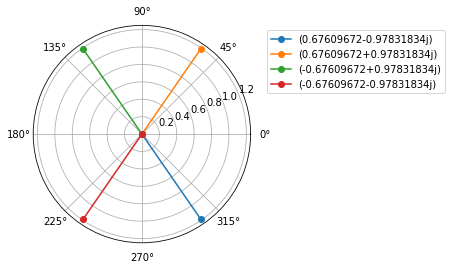

In [45]:
f = np.array([2, 0, 1, 0, 1])
test_roots(f)


[(-1.272019649514069+0j), (1.9076111322509744e-18-0.7861513777574233j), (9.938299752782707e-17+0.7861513777574234j), (1.272019649514069-1.1102230246251565e-16j)]


True

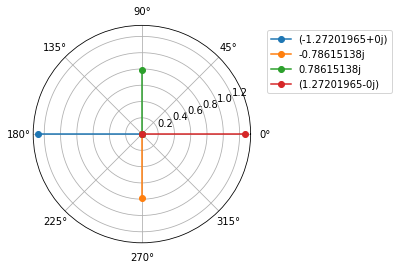

In [46]:
f = np.array([-1, 0, -1, 0, 1])
test_roots(f)

### Übung 4.3 [2 Punkte]

Führen Sie den Test für die Polynome

$$
\begin{eqnarray}
p_1(x) &=& x^4 + x^3 + 3x^2 + 2x + 2 \\
p_2(x) &=& 3x^6 + 5x^4 - 4x^2 - 3x + 5 \\
\end{eqnarray}
$$

durch. Visualisieren Sie die gefundenen Nullstellen in der komplexen Zahlenebene. Wie bereits eingeführt, kommen komplexe Lösungen immer in komplex-konjugierten Paaren vor, sie sollten also eine Symmetrie um die y-Achse beobachten können für Lösungen mit imaginärem Anteil. Verwenden Sie auch hier geeignete Anfangswerte.


[(-0.5+0.8660254037844386j), (-3.3598745185599075e-17-1.414213562373095j), (-4.0745944190295565e-17+1.4142135623730951j), (-0.4999999999999999-0.8660254037844388j)]
True


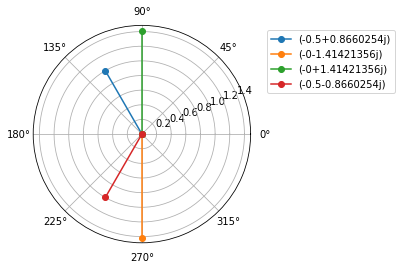

In [47]:
# EXERCISE START
p1 = np.array([2,2,3,1,1])
# EXERCISE STOP

is_pass = test_roots( p1, acc_digits=6 )
print(is_pass)


[(0.7066184279549305-0.4772793879214104j), (0.7066184279549304+0.47727938792141034j), (-1.2584259071708566-1.6542393253199234e-16j), (-1.821477615405671+2.3943880084033607e-16j)]
True


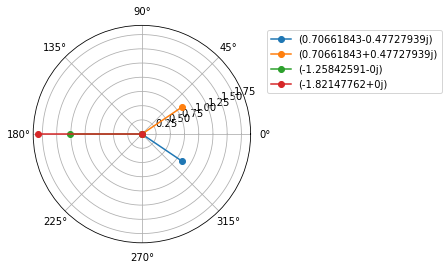

In [48]:
p2 = np.array([5,-3,-4,5,3])
# EXERCISE START
is_pass = test_roots( p2, acc_digits=6 )
print(is_pass)
# EXERCISE STOP